In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"cpdata.csv")
df

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


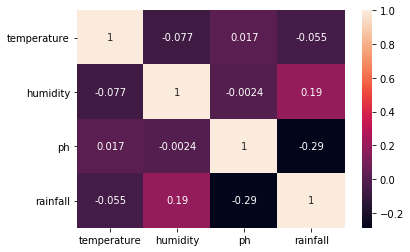

In [3]:
sns.heatmap(df[["temperature","humidity","ph","rainfall"]].corr(),annot=True)

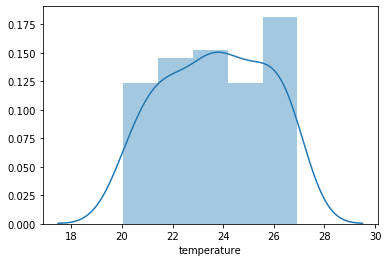

In [4]:
sns.distplot(df["temperature"][(df["label"]=="rice")])

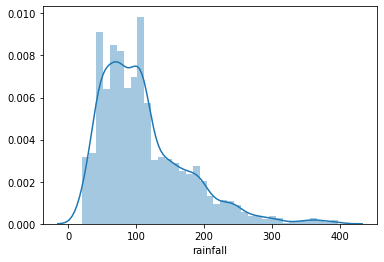

In [5]:
sns.distplot(df["rainfall"])

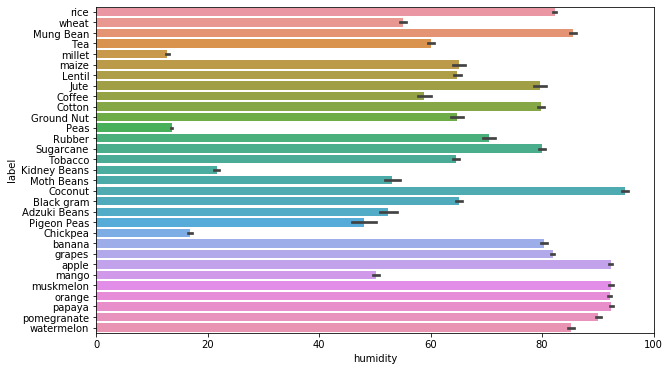

In [6]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "humidity", y = "label",ax=ax ,data = df)

In [7]:
df.head(100)

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
95,22.683191,83.463583,6.604993,194.265172,rice
96,21.533463,82.140041,6.500343,295.924880,rice
97,21.408658,83.329319,5.935745,287.576694,rice
98,26.543481,84.673536,7.072656,183.622266,rice


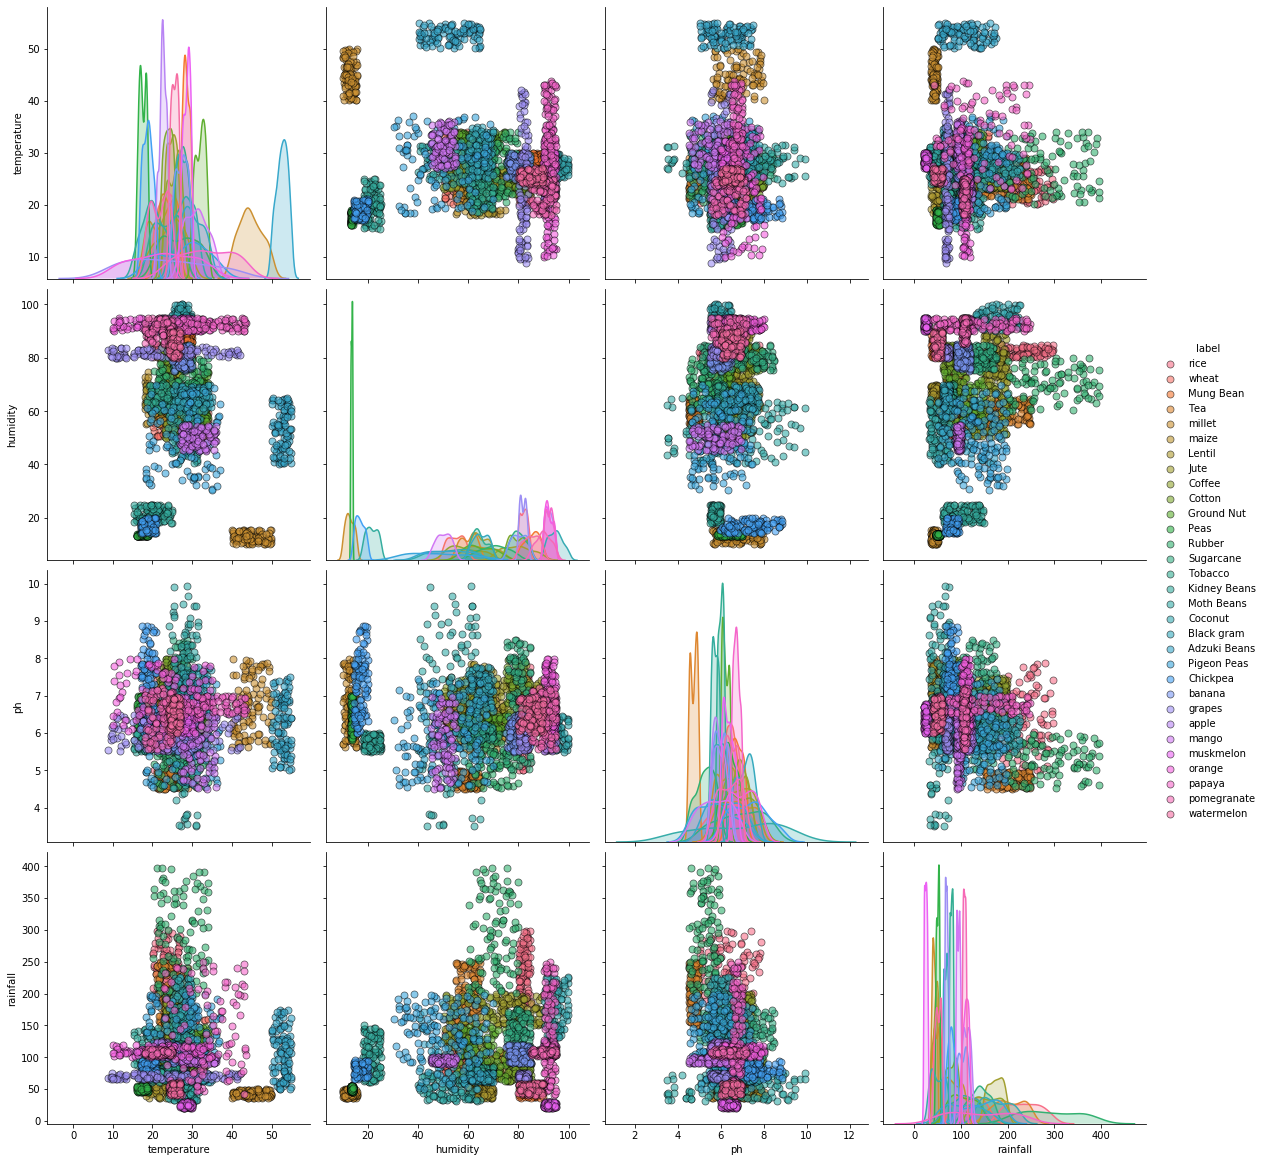

In [8]:
sns.pairplot(df, hue = 'label', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 50, 'edgecolor': 'k'},
             size = 4)

In [9]:
cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
log_fit = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,pred)
print("The accuracy of this model is: ", accuracy*100)

The accuracy of this model is:  56.53225806451613


In [12]:
from sklearn.ensemble import RandomForestClassifier
algo=RandomForestClassifier(n_estimators=10,random_state=10)

In [13]:
algo.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [14]:
pred1=algo.predict(X_test)
a1=algo.score(X_test,y_test)

a=accuracy_score(y_test,pred1)

print("The accuracy of this model is: ", a*100)

The accuracy of this model is:  92.0967741935484


In [15]:
from prettytable import PrettyTable
model=['Logistic Regression','Random Forest']
AUC=[accuracy,a]
table= PrettyTable()

table.add_column("Model",model)
table.add_column("AUC",AUC)
print(table)

+---------------------+--------------------+
|        Model        |        AUC         |
+---------------------+--------------------+
| Logistic Regression | 0.5653225806451613 |
|    Random Forest    | 0.9209677419354839 |
+---------------------+--------------------+


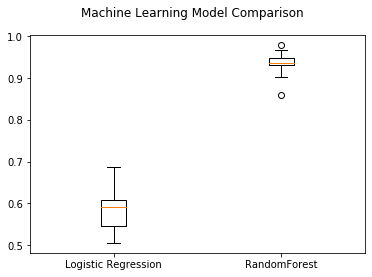

In [16]:
outcome = []
model_names = []
models = [
          ('Logistic Regression', clf),
          ('RandomForest', algo)]
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=20, random_state=10, shuffle=True)
    results = model_selection.cross_val_score(model, X_train, y_train, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    #print(output_message)
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1,labels = ['Black gram', 'Chickpea',
       'Coconut', 'Coffee', 'Cotton', 'Ground Nut', 'Jute', 'Kidney Beans',
       'Lentil', 'Moth Beans', 'Mung Bean', 'Peas', 'Pigeon Peas', 'Rubber',
       'Sugarcane', 'Tea', 'Tobacco', 'apple', 'banana', 'grapes', 'maize',
       'mango', 'millet', 'muskmelon', 'orange', 'papaya', 'pomegranate',
       'rice', 'watermelon', 'wheat'])

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  

In [18]:
prob_pred = algo.predict_proba(X_test)
print(prob_pred)

classes = clf.classes_ 
print(classes)

[[0.  0.  0.  ... 0.  0.  0.6]
 [0.9 0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.2 0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]
['Adzuki Beans' 'Black gram' 'Chickpea' 'Coconut' 'Coffee' 'Cotton'
 'Ground Nut' 'Jute' 'Kidney Beans' 'Lentil' 'Moth Beans' 'Mung Bean'
 'Peas' 'Pigeon Peas' 'Rubber' 'Sugarcane' 'Tea' 'Tobacco' 'apple'
 'banana' 'grapes' 'maize' 'mango' 'millet' 'muskmelon' 'orange' 'papaya'
 'pomegranate' 'rice' 'watermelon' 'wheat']


In [19]:
values = [[float(x) for x in input("Enter the Tempertature,Humidity,pH,Rainfall in order: ").split()]]

Enter the Tempertature,Humidity,pH,Rainfall in order: 29 80 5 200


In [20]:
lr_proba_predict = algo.predict_proba(values)
print(lr_proba_predict)

[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.1 0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.  0. ]]


In [21]:
df_pred = pd.DataFrame(data = prob_pred, columns = ['Black gram', 'Chickpea',
       'Coconut', 'Coffee', 'Cotton', 'Ground Nut', 'Jute', 'Kidney Beans',
       'Lentil', 'Moth Beans', 'Mung Bean', 'Peas', 'Pigeon Peas', 'Rubber',
       'Sugarcane', 'Tea', 'Tobacco', 'apple', 'banana', 'grapes', 'maize',
       'mango', 'millet', 'muskmelon', 'orange', 'papaya', 'pomegranate',
       'rice', 'watermelon', 'wheat',''])
pd.set_option('display.max_columns', None)

df_pred.head(20)

,Black gram,Chickpea,Coconut,Coffee,Cotton,Ground Nut,Jute,Kidney Beans,Lentil,Moth Beans,Mung Bean,Peas,Pigeon Peas,Rubber,Sugarcane,Tea,Tobacco,apple,banana,grapes,maize,mango,millet,muskmelon,orange,papaya,pomegranate,rice,watermelon,wheat,
0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6
1,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0
5,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4


In [22]:
probabilities = np.ravel(lr_proba_predict)
d = {k:v for k,v in zip(classes,probabilities)}
print(d)


{'Adzuki Beans': 0.0, 'Black gram': 0.0, 'Chickpea': 0.0, 'Coconut': 0.0, 'Coffee': 0.0, 'Cotton': 0.0, 'Ground Nut': 0.0, 'Jute': 0.0, 'Kidney Beans': 0.0, 'Lentil': 0.0, 'Moth Beans': 0.0, 'Mung Bean': 0.0, 'Peas': 0.0, 'Pigeon Peas': 0.0, 'Rubber': 0.5, 'Sugarcane': 0.1, 'Tea': 0.0, 'Tobacco': 0.0, 'apple': 0.0, 'banana': 0.0, 'grapes': 0.0, 'maize': 0.0, 'mango': 0.0, 'millet': 0.0, 'muskmelon': 0.0, 'orange': 0.0, 'papaya': 0.0, 'pomegranate': 0.0, 'rice': 0.4, 'watermelon': 0.0, 'wheat': 0.0}


In [23]:
from operator import itemgetter
sort = sorted(d.items(), key=itemgetter(1),reverse = True)
crop = []
prob = []
for i,v in sort:
    crop.append(i.lower())
    prob.append(v)
final_d = {k:v for k,v in zip(crop,prob)}
print(final_d)

{'rubber': 0.5, 'rice': 0.4, 'sugarcane': 0.1, 'adzuki beans': 0.0, 'black gram': 0.0, 'chickpea': 0.0, 'coconut': 0.0, 'coffee': 0.0, 'cotton': 0.0, 'ground nut': 0.0, 'jute': 0.0, 'kidney beans': 0.0, 'lentil': 0.0, 'moth beans': 0.0, 'mung bean': 0.0, 'peas': 0.0, 'pigeon peas': 0.0, 'tea': 0.0, 'tobacco': 0.0, 'apple': 0.0, 'banana': 0.0, 'grapes': 0.0, 'maize': 0.0, 'mango': 0.0, 'millet': 0.0, 'muskmelon': 0.0, 'orange': 0.0, 'papaya': 0.0, 'pomegranate': 0.0, 'watermelon': 0.0, 'wheat': 0.0}


In [24]:
required = input("Enter the crop which you want to supply: ").lower()
if required == crop[0]:
    print(required+" crop can be grown")
elif required in crop[:3]:
    print("You can grow "+required+" crop. But it is preferred to grow "+crop[0])
elif required in crop[4:31]:
    print("Cannot grow "+required+" crop")
else:
    print("No such crop exists")

Enter the crop which you want to supply: rice
You can grow rice crop. But it is preferred to grow rubber
